# Random walk in financial markets

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

A Monte Carlo simulation technique will be used for investigating the potential evolution of asset prices over time. We assume that the evolution is subject to daily returns that follow a normal distribution.(정규 분포, 가우시안 분포) This type of price evolution is also known as a “random walk”.

The following piece of code loads the market prices for Alphabet Inc. (GOOGL) over the past 15 years.


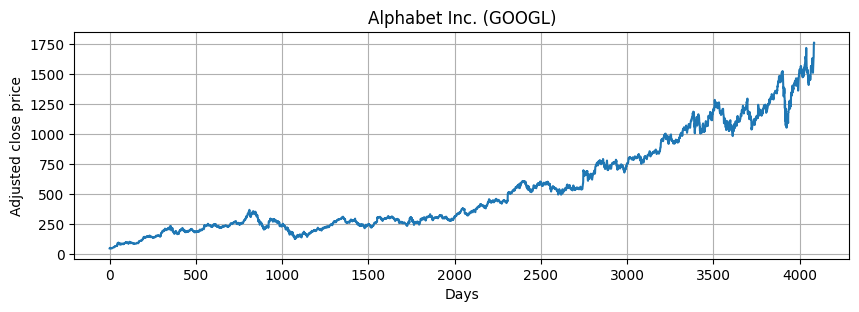

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
 
alpha = data.DataReader('GOOGL', 'yahoo', start='8/19/2004')
price = alpha['Adj Close'].values

plt.figure(figsize=(10,3), dpi=100)
plt.plot(price)
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Adjusted close price')
plt.title('Alphabet Inc. (GOOGL)')
plt.show()

The daily return is the daily growth rate in percentage, 

$$
  r_t = \frac{p_t - p_{t-1}}{p_{t-1}}\times 100 \text{  (%)}
$$


where $p_t$ represents the price at day $t$. 





The volatility(변동성) is defined by the standard deviation of the return, and the annual volatility $v$ is the standard deviation multiplied by $\sqrt{252}$ 

$$
  \sigma_\text{annually} = \sqrt{\frac{252}{\tau}\sum_{t}^\tau\left({r_t - \bar{r}}\right)^2}
$$

where we assume that the stock market opens 252 days per year, and $\tau$ is the number of data points we are considering.

_**(Problem 1)**_ What is the annual volatility for this asset?

In [ ]:
gamma = len(price)
sig_sum = 0

r_t = [0] #0번째 성분 : day1 --> 전 값이 없으므로 0으로 설정.

for i in range(1,gamma) :
  r_t.append((price[i] - price[i-1]) * 100 / price[i-1])

sig_annual = (252) ** 0.5 * np.std(r_t)

print(f'Annual volatility : {sig_annual:.5f}%') #f-string 








Annual volatility : 30.61472%


Compound annual growth rate (CAGR) is the rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each year of the investment’s lifespan.

$$
\text{CAGR} = \left(\left(\frac{p_\tau}{p_1}\right)^{252/\tau}-1\right)\times 100 \text{ (%)}
$$


_**(Problem 2)**_ What is the compound annual growth rate for this asset?

In [ ]:
cagr = ((price[-1]/price[0])**(252/gamma) -1 ) 
cagr_per = cagr * 100

print(f'Compound annual growth rate : {cagr_per:.5f}%')

Compound annual growth rate : 24.53258%
0.24532579779201136


So we characterized the time evolution of this asset's price by two numbers, the compound annual growth rate (average return) and the annual volatility (risk).

Now we can predict the future prices by using those two factors. That is,

$$
  p_{t+1} = p_{t}\left( 1+\tilde{r}_{t}\right)
$$

where $\tilde{r}_{t}$ is sampled from Gaussian distribution with mean value $\text{CAGR}/252$ and standard deviation $\sigma_\text{annually}/\sqrt{252}$.

_**(Problem 3)**_ Predict the price for the next year, in other words, predict $p_{\tau+1},\dots,p_{\tau+252}$. Overlap the predicted price and the past price history on the same plot. Do they look natural?

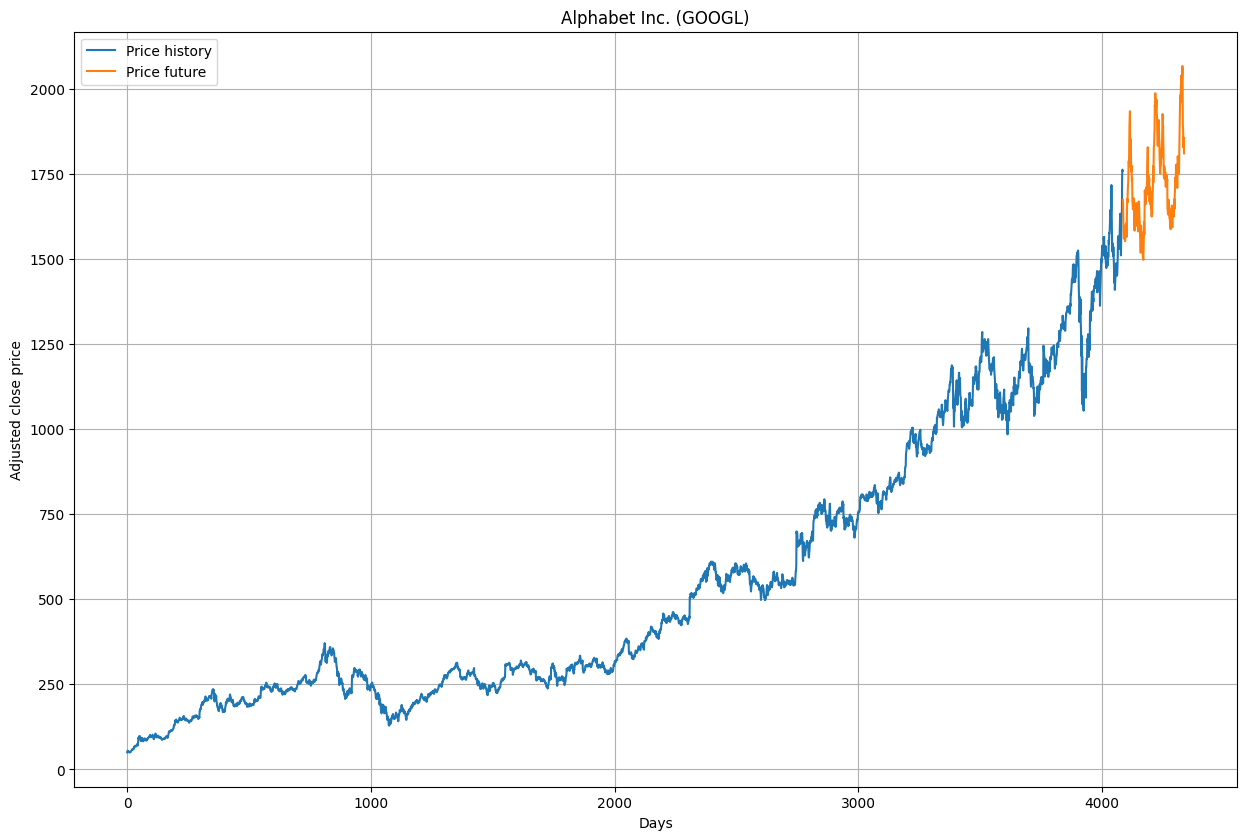

[1674.29015936 1663.23251072 1615.0731975  1577.34293494 1559.65082984
 1569.44558967 1568.11684323 1586.75203579 1597.56678925 1552.41661614
 1574.13043993 1592.58193094 1591.49141557 1604.4801613  1605.47603348
 1565.27133267 1581.48524829 1650.78185736 1676.59356137 1666.81137814
 1700.84697884 1714.17887869 1727.23855159 1766.99515954 1788.3334336
 1772.25553677 1850.3802482  1893.34498616 1917.46513613 1934.30319822
 1839.35801448 1790.77571636 1852.47152399 1820.96201971 1756.61704055
 1775.00914528 1754.07523033 1729.4226165  1737.95754217 1675.62750551
 1662.2148955  1646.61686738 1646.01040222 1679.08901716 1675.65062042
 1659.95753149 1632.20561216 1605.02080195 1583.19956774 1632.66071254
 1648.80926957 1625.65139531 1613.65386828 1596.91665281 1604.73574486
 1664.43052126 1601.24894179 1632.58813666 1650.40219661 1610.71847694
 1608.7366009  1624.62170982 1580.8996024  1627.47999803 1665.29277057
 1669.16829718 1664.64871504 1651.58428604 1615.59960689 1610.09756533
 1587.9

In [ ]:
price_future = np.ones(252)

for i in range(252):
  if i == 0 :
    price_future[0] = price[-1]*(1 + (cagr/252) + np.random.randn()*sig_annual/100/((252)**0.5)) #sig_annual과 cagr은 퍼센트 단위에서 다시 소수로 바꿔야...
  else :
    price_future[i] = price_future[i-1]*(1 + (cagr/252) +np.random.randn()*sig_annual/100/((252)**0.5))

plt.figure(figsize=(15,10), dpi=100)
plt.plot(price , label = "Price history")
plt.plot(np.arange(252) + gamma, price_future , label = "Price future") #gamma만큼 평행 이동.
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Adjusted close price')
plt.title('Alphabet Inc. (GOOGL)')
plt.legend()
plt.show()
print(price_future)

_**(Problem4)**_ Run the above simulation for 10000 instances, and display the histogram of the value that this asset will be evaluated after one year.


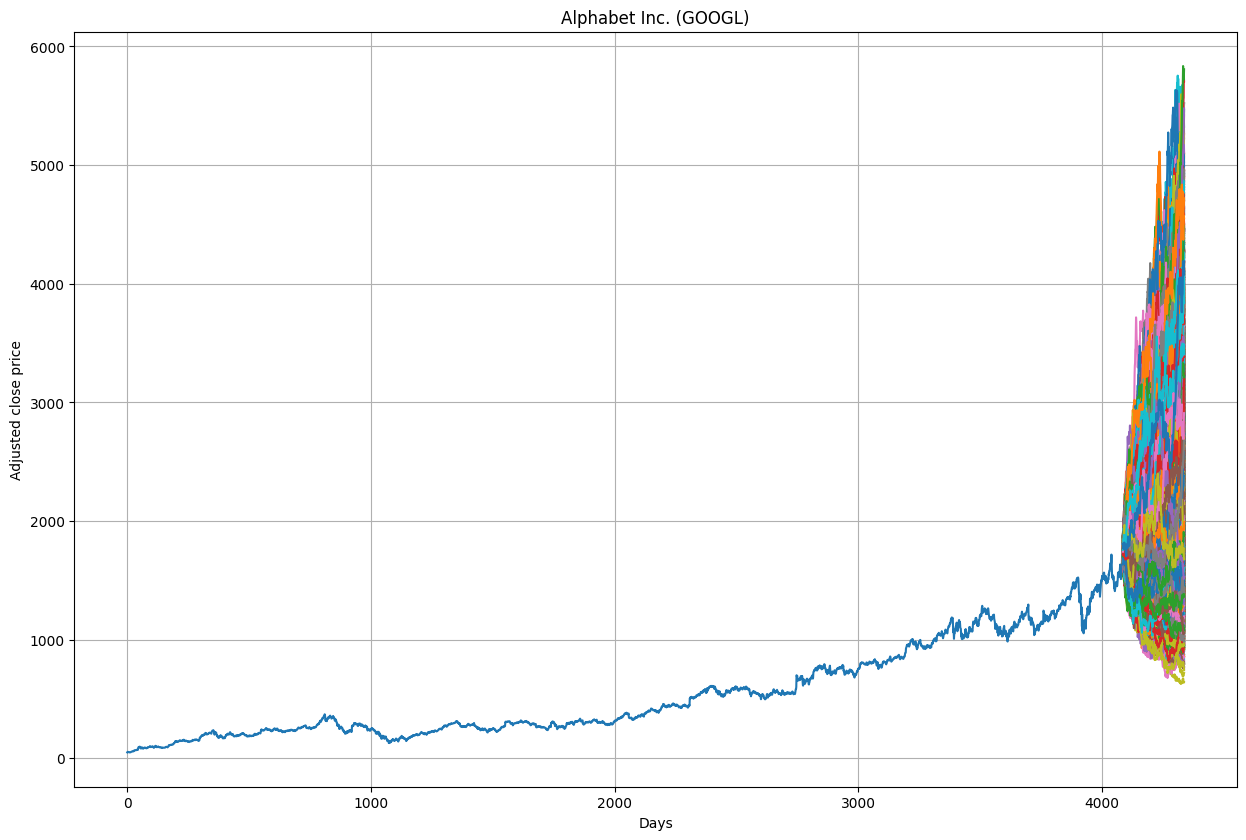

In [ ]:
price_after = np.ones(10000)


plt.figure(figsize=(15,10), dpi=100)
plt.plot(price) #여러 그래프 동시에 그리기. 바꿔가면서 해보기...


for i in range(10000) :
  price_future = np.ones(252)

  for j in range(252):
    if j == 0 :
      price_future[0] = price[-1]*(1 + (cagr/252) + np.random.randn()*sig_annual/100/((252)**0.5)) #sig_annual과 cagr은 퍼센트 단위에서 다시 소수로 바꿔야...
    else :
      price_future[j] = price_future[j-1]*(1 + (cagr/252) +np.random.randn()*sig_annual/100/((252)**0.5))

  plt.plot(np.arange(252) + gamma , price_future)
  price_after[i] = price_future[-1]

plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Adjusted close price')
plt.title('Alphabet Inc. (GOOGL)')
plt.show()

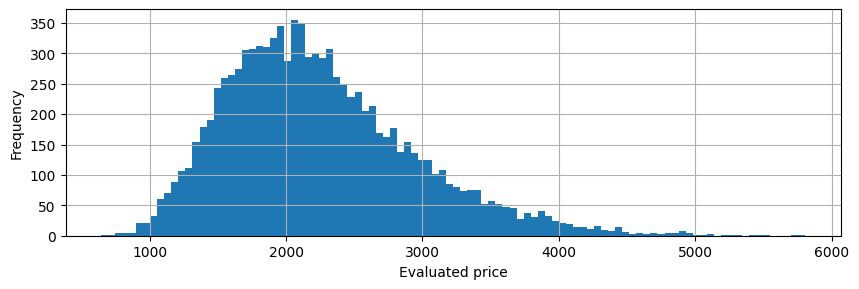

In [ ]:
plt.figure(figsize=(10,3), dpi=100)
plt.hist(price_after,bins = 100)
plt.grid(True)
plt.xlabel('Evaluated price')
plt.ylabel('Frequency')
plt.show()

_**(Problem 5)**_  What is the expected value that this asset will be evaluated, after one year? What is the minimum value that this asset will be evaluated with 95% probability, after one year? What is the probability that the value of this asset will be doubled in the next year?

Expected value: 2247.5656047458
5-percentile value: 1302.4688344623219
Prob_double: 5.4 %


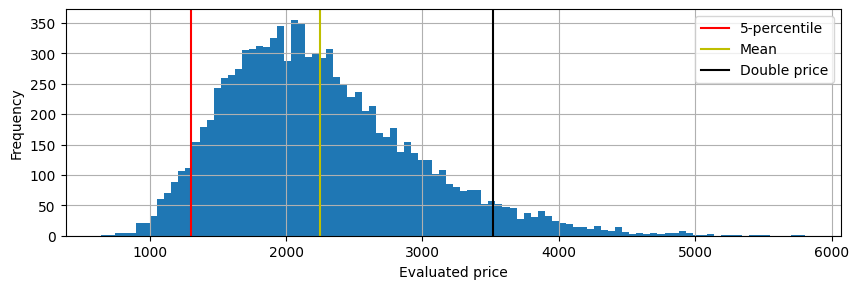

In [ ]:
e_value = np.mean(price_after)
five_per = np.percentile(price_after,5) #퍼센트
double_per = (len(price_after[price_after>=2*price[-1]])) * 100 /(len(price_after)) #price_after[] --> 조건에 맞는 것만 반환. 하지만 price_after원본은 그대로.

print (f'Expected value: {e_value}')
print (f'5-percentile value: {five_per}')
print (f'Prob_double: {double_per} %')

plt.figure(figsize=(10,3), dpi=100)
plt.hist(price_after,bins = 100)
plt.axvline(five_per, color='r', label='5-percentile') 
plt.axvline(e_value, color='y', label='Mean')
plt.axvline(price[-1]*2, color='k', label='Double price')
plt.grid(True)
plt.xlabel('Evaluated price')
plt.ylabel('Frequency')
plt.legend()
plt.show()